<a href="https://colab.research.google.com/github/leopapuma/tarea-10/blob/main/tarea_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

función de costo total:
                             60   20   20
0.15⋅Q₁ + 0.05⋅Q₂ + 0.1⋅Q₃ + ── + ── + ──
                             Q₃   Q₂   Q₁

restricción de area:
Q₁ + Q₂ + Q₃ - 25

EOQ sin restricción:
Q1* = 11.5470
Q2* = 20.0000
Q3* = 24.4949

area requerida por EOQ: 56.0419028116243
area disponible: 25

Condiciones de primer orden:
           20 
λ + 0.15 - ───
             2
           Q₁ 
           20 
λ + 0.05 - ───
             2
           Q₂ 
          60 
λ + 0.1 - ───
            2
          Q₃ 
Q₁ + Q₂ + Q₃ - 25

¿Optimización exitosa?: True
Mensaje del solver: Optimization terminated successfully

Cantidades óptimas con restricción:
Q1* = 6.3397
Q2* = 7.0878
Q3* = 11.5725

Costo total mínimo: 13.623773559693312
Área utilizada: 24.999999999999996


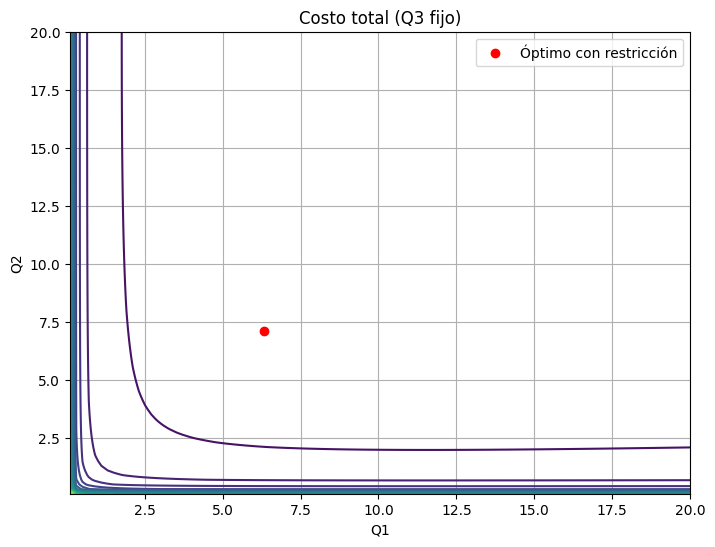

In [6]:
# el ejercicio es el ejemplo 11.2-3


#  se usaran las siguientes librerias para resolve el ejemplo que se pide realizar

import sympy as sp
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt

# defenimos el modelo

# numero de articulos que hay
n = 3

# Variables de decisión
Q = sp.symbols('Q1:%d' % (n+1), positive=True)
# datos que nos da el ejercicio  11.2-3  son:



K = sp.Matrix([10, 5, 15])          # costo de ordenar
D = sp.Matrix([2, 4, 4])            # demanda diaria
h = sp.Matrix([0.30, 0.10, 0.20])   # costo de mantener diario
s = sp.Matrix([1, 1, 1])            # area por unidad
W = 25                              # area total disponible


# funcion de costo total

TC = sum(K[i]*D[i]/Q[i] + h[i]*Q[i]/2 for i in range(n))

# restriccion de area
G = sum(s[i]*Q[i] for i in range(n)) - W

print("función de costo total:")
sp.pprint(TC)
print("\nrestricción de area:")
sp.pprint(G)
# escribimos la ecuacion sin restricion
Q_eoq = [sp.sqrt(2*K[i]*D[i]/h[i]) for i in range(n)]

print("\nEOQ sin restricción:")
for i, q in enumerate(Q_eoq):
    print(f"Q{i+1}* = {float(q):.4f}")

# verificamos la restricion
area_eoq = sum(s[i]*Q_eoq[i] for i in range(n))
print("\narea requerida por EOQ:", float(area_eoq))
print("area disponible:", W)

#  formulamos la lagrange

lmbda = sp.symbols('lambda', real=True)

L = TC + lmbda*G

FOC = [sp.diff(L, Q[i]) for i in range(n)] + [G]

print("\nCondiciones de primer orden:")
for eq in FOC:
    sp.pprint(eq)


#  construimos la solucion numerica  scmpy

# conversion a vectores numpy 1d
K_np = np.array(K, dtype=float).flatten()
D_np = np.array(D, dtype=float).flatten()
h_np = np.array(h, dtype=float).flatten()
s_np = np.array(s, dtype=float).flatten()

# función objetivo
def TC_num(x):
    return np.sum(K_np*D_np/x + h_np*x/2)

# restricción de area
cons = [{
    'type': 'ineq',
    'fun': lambda x: W - np.dot(s_np, x)
}]

# cotas Qi > 0
bnds = [(1e-3, None)]*n

# punto inicial (EOQ)
x0 = np.array([float(q) for q in Q_eoq])

# optimizacion
res = optimize.minimize(
    TC_num,
    x0,
    method='SLSQP',
    bounds=bnds,
    constraints=cons
)

# mostramos los resultados obtenidos con un print
print("\n¿Optimización exitosa?:", res.success) # probamos si es exitoso la optimizacion
print("Mensaje del solver:", res.message)

print("\nCantidades óptimas con restricción:")
for i, q in enumerate(res.x):
    print(f"Q{i+1}* = {q:.4f}")

print("\nCosto total mínimo:", res.fun)
print("Área utilizada:", np.dot(s_np, res.x))


# lo que se grafica sera q1 vs q2 con q3 que sea fijo

Q1 = np.linspace(0.1, 20, 100)
Q2 = np.linspace(0.1, 20, 100)
Q1g, Q2g = np.meshgrid(Q1, Q2)

Q3_fixed = res.x[2]

Z = (K_np[0]*D_np[0]/Q1g + h_np[0]*Q1g/2 +
     K_np[1]*D_np[1]/Q2g + h_np[1]*Q2g/2 +
     K_np[2]*D_np[2]/Q3_fixed + h_np[2]*Q3_fixed/2)

plt.figure(figsize=(8,6))
plt.contour(Q1g, Q2g, Z, 20)
plt.plot(res.x[0], res.x[1], 'ro', label='Óptimo con restricción')
plt.xlabel('Q1')
plt.ylabel('Q2')
plt.title('Costo total (Q3 fijo)')
plt.legend()
plt.grid(True)
plt.show()